  Using cached deepface-0.0.75-py3-none-any.whl (65 kB)
Note: you may need to restart the kernel to use updated packages.Installing collected packages: deepface



In [4]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np

In [1]:
imagem = cv2.imread("imagens/euSorrindo.jpeg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

NameError: name 'cv2' is not defined

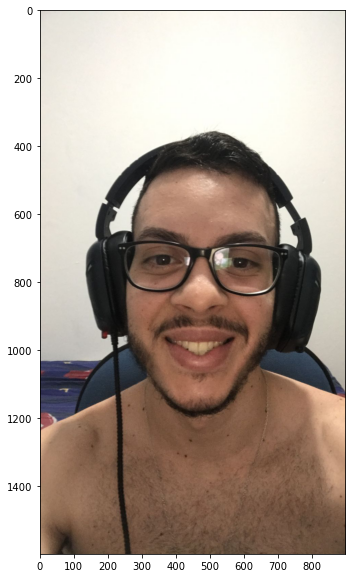

In [6]:
plt.figure(figsize=(20, 10))
plt.imshow(imagem)

In [7]:
classificador_dlib_68_caminho = 'estudo-dlib/shape_predictor_68_face_landmarks.dat'
classificador_dlib = dlib.shape_predictor(classificador_dlib_68_caminho)
detector_face = dlib.get_frontal_face_detector()

In [8]:
def anotar_rosto(imagem):
    retangulos = detector_face(imagem, 1)

    if len(retangulos) == 0:
        return None
    
    for k, d in enumerate(retangulos):
        print("Identificado rosto " + str(k))
        cv2.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 255))

        return imagem

In [9]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_rosto(imagem_anotada)

Identificado rosto 0


In [10]:
def pontos_marcos_faciais(imagem):
    retangulos = detector_face(imagem, 1)

    if len(retangulos) == 0:
        return None
    
    marcos = []

    for ret in retangulos:
        marcos.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem, ret).parts()]))

        return marcos

In [11]:
marcos_faciais = pontos_marcos_faciais(imagem)

In [12]:
len(marcos_faciais)

1

In [13]:
len(marcos_faciais[0])

68

In [14]:
def anotar_marcos_faciais(imagem, marcos):
    
    for marco in marcos:
        for idx, ponto in enumerate(marco):
            centro = (ponto[0, 0], ponto[0,1])
            cv2.circle(imagem, centro, 3, (255, 255, 0), -1)
            cv2.putText(imagem, str(idx), centro, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    return imagem

In [15]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)

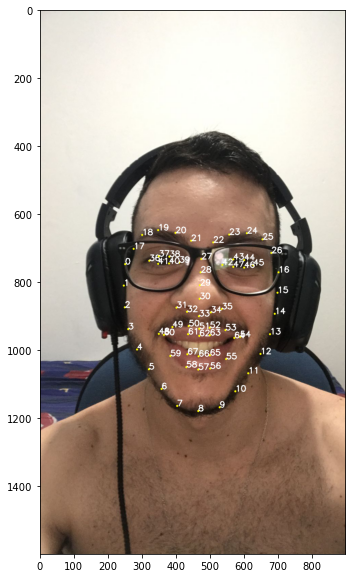

In [16]:
plt.figure(figsize=(20,10))
plt.imshow(imagem_anotada)